The purpose of this workbook is to analyse the life expectancy dataset published on Kaggle in order to:

1) Build a model that accurately predicts life expectancy given certain economic and social features relating to a country

2) Confirm which features in our model are the most important when predicting life expectancy


Source: https://www.kaggle.com/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv 




Let's start by conducting some initial analysis and visualisation of the dataset.

In [1]:
import pandas as pd
import numpy as np

In [2]:
life_data = pd.read_csv("Life Expectancy Data.csv")
life_data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [3]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
life_data.describe()

Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000       0.000000   
25%       0.877500                4.685343    77.000000       0.000000   
50%       3.755000               64.912906    92.000000      17.000000   
75%       7.702500              441.534144    97.000000     360.250000   
max      17.870000            19479.911610    99.000000  212183.000000   

              BMI   under-five deaths         Polio  Total expenditure  \
count  2904.000000         2938.000000  2919.000000         2712.00000   
mean     38.321247           42.035739    82.550188            5.93819   
std      20.044034          160.445548    23.428046            2.49832   
min       1.000000            0.000000     3.000000            0.37000   
25%      19.300000            0.000000    78.000000            4.26000   
50%      43.500000            4.000000    93.000000            5.75500   
75%      56.200000           28.000000    97.000000            7.49250   
max      87.300000         2500.000000    99.000000           17.60000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2919.000000  2938.000000    2490.000000  2.286000e+03   
mean     82.324084     1.742103    7483.158469  1.275338e+07   
std      23.716912     5.077785   14270.169342  6.101210e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     463.935626  1.957932e+05   
50%      93.000000     0.100000    1766.947595  1.386542e+06   
75%      97.000000     0.800000    5910.806335  7.420359e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2904.000000          2904.000000   
mean                4.839704             4.870317   
std                 4.420195             4.508882   
min                 0.100000             0.100000   
25%                 1.600000             1.500000   
50%                 3.300000             3.300000   
75%                 7.200000             7.200000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2771.000000  2775.000000  
mean                          0.627551    11.992793  
std                           0.210904     3.358920  
min                           0.000000     0.000000  
25%                           0.493000    10.100000  
50%                           0.677000    12.300000  
75%                           0.779000    14.300000  
max                           0.948000    20.700000

In [5]:
import matplotlib.pyplot as plt

Let's plot histograms of the numerical variables

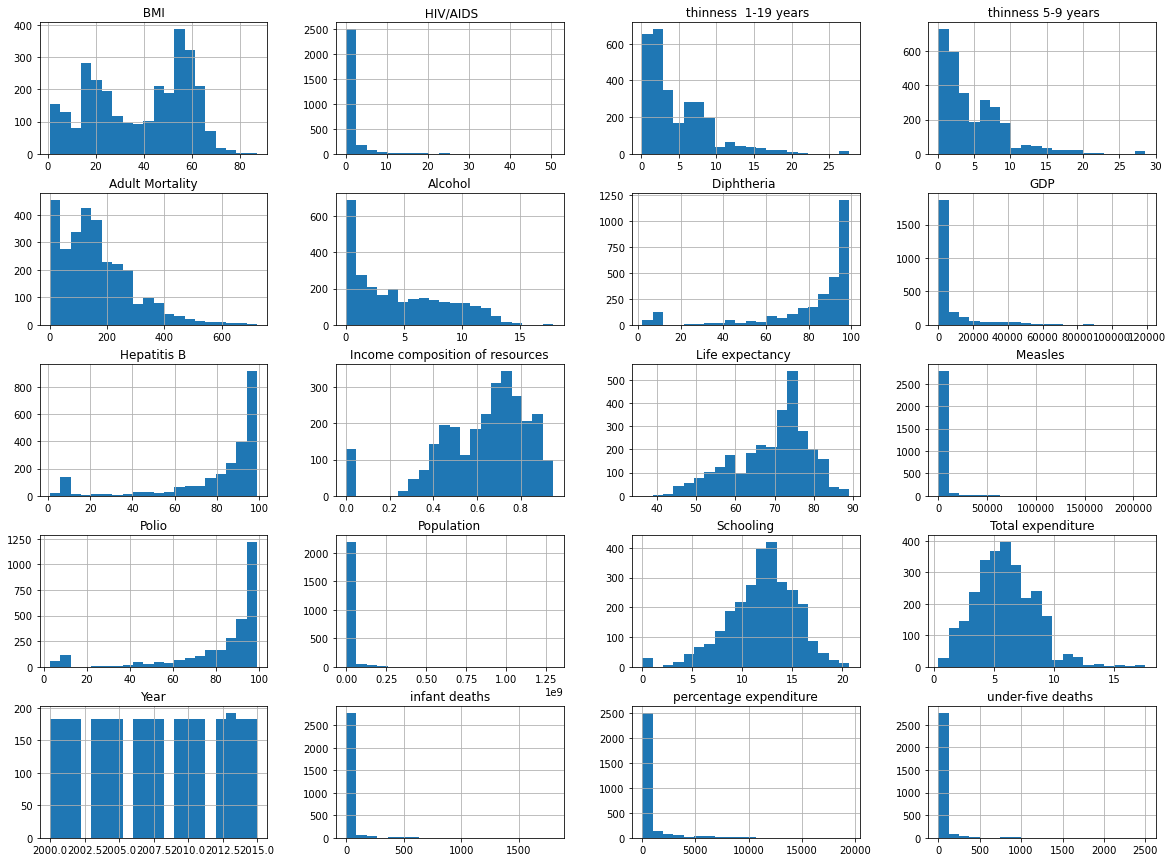

In [6]:
life_data.hist(bins=20, figsize=(20,15))
plt.show()

Let's also consider:

    1) Status - which is a categorical variable
    
    2) The null values relating to life expectancy

In [7]:
life_data["Status"].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [8]:
life_data[life_data["Life expectancy "].isnull()]

Country  Year      Status  Life expectancy   \
624            Cook Islands  2013  Developing               NaN   
769                Dominica  2013  Developing               NaN   
1650       Marshall Islands  2013  Developing               NaN   
1715                 Monaco  2013  Developing               NaN   
1812                  Nauru  2013  Developing               NaN   
1909                   Niue  2013  Developing               NaN   
1958                  Palau  2013  Developing               NaN   
2167  Saint Kitts and Nevis  2013  Developing               NaN   
2216             San Marino  2013  Developing               NaN   
2713                 Tuvalu  2013  Developing               NaN   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
624               NaN              0     0.01                0.000000   
769               NaN              0     0.01               11.419555   
1650              NaN              0     0.01              871.878317   
1715              NaN              0     0.01                0.000000   
1812              NaN              0     0.01               15.606596   
1909              NaN              0     0.01                0.000000   
1958              NaN              0      NaN              344.690631   
2167              NaN              0     8.54                0.000000   
2216              NaN              0     0.01                0.000000   
2713              NaN              0     0.01               78.281203   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
624          98.0         0  ...   98.0               3.58         98.0   
769          96.0         0  ...   96.0               5.58         96.0   
1650          8.0         0  ...   79.0              17.24         79.0   
1715         99.0         0  ...   99.0               4.30         99.0   
1812         87.0         0  ...   87.0               4.65         87.0   
1909         99.0         0  ...   99.0               7.20         99.0   
1958         99.0         0  ...   99.0               9.27         99.0   
2167         97.0         0  ...   96.0               6.14         96.0   
2216         69.0         0  ...   69.0               6.50         69.0   
2713          9.0         0  ...    9.0              16.61          9.0   

       HIV/AIDS          GDP  Population   thinness  1-19 years  \
624         0.1          NaN         NaN                    0.1   
769         0.1   722.756650         NaN                    2.7   
1650        0.1  3617.752354         NaN                    0.1   
1715        0.1          NaN         NaN                    NaN   
1812        0.1   136.183210         NaN                    0.1   
1909        0.1          NaN         NaN                    0.1   
1958        0.1  1932.122370       292.0                    0.1   
2167        0.1          NaN         NaN                    3.7   
2216        0.1          NaN         NaN                    NaN   
2713        0.1  3542.135890      1819.0                    0.2   

       thinness 5-9 years  Income composition of resources  Schooling  
624                   0.1                              NaN        NaN  
769                   2.6                            0.721       12.7  
1650                  0.1                              NaN        0.0  
1715                  NaN                              NaN        NaN  
1812                  0.1                              NaN        9.6  
1909                  0.1                              NaN        NaN  
1958                  0.1                            0.779       14.2  
2167                  3.6                            0.749       13.4  
2216                  NaN                              NaN       15.1  
2713                  0.1                              NaN        0.0  

[10 rows x 22 columns]

The analysis above indicates:

1) The BMI figures may be incorrect. The number of datapoints with a BMI of over 50 suggests there may be errors. I will ignore these. 

2) The data is split 83:17 wrt Developed and Developing. Therefore, we should ensure our test and training sets reflect this distribution. I will perform this by considering stratified sampling. 

3) Given I am trying to make predictions mostly on the data, I do not want to generalise on countries themselves. Therefore, I will not consider the names of countries or years during this analysis. 

4) Given there are missing values, I will need to consider this in detail. There are many entries which are either a 0 or 1. I have assumed these were placed by the author for accuracy purposes. I also do not have the expertise to adjust these figures myself so I have left them as they are.

5) There are 10 values where the life expectancy is missing. Since I need these figures for my predictions, I will drop the respective rows from the analysis.

First, I will drop the rows corresponding to the ten missing life expectancy values. 

In [9]:
life_data_clean = life_data.dropna(subset=["Life expectancy "]).reset_index(drop=True)
life_data_clean

Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
...           ...   ...         ...               ...              ...   
2923     Zimbabwe  2004  Developing              44.3            723.0   
2924     Zimbabwe  2003  Developing              44.5            715.0   
2925     Zimbabwe  2002  Developing              44.8             73.0   
2926     Zimbabwe  2001  Developing              45.3            686.0   
2927     Zimbabwe  2000  Developing              46.0            665.0   

      infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   \
0                62     0.01               71.279624         65.0      1154   
1                64     0.01               73.523582         62.0       492   
2                66     0.01               73.219243         64.0       430   
3                69     0.01               78.184215         67.0      2787   
4                71     0.01                7.097109         68.0      3013   
...             ...      ...                     ...          ...       ...   
2923             27     4.36                0.000000         68.0        31   
2924             26     4.06                0.000000          7.0       998   
2925             25     4.43                0.000000         73.0       304   
2926             25     1.72                0.000000         76.0       529   
2927             24     1.68                0.000000         79.0      1483   

      ...  Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  \
0     ...    6.0               8.16         65.0        0.1  584.259210   
1     ...   58.0               8.18         62.0        0.1  612.696514   
2     ...   62.0               8.13         64.0        0.1  631.744976   
3     ...   67.0               8.52         67.0        0.1  669.959000   
4     ...   68.0               7.87         68.0        0.1   63.537231   
...   ...    ...                ...          ...        ...         ...   
2923  ...   67.0               7.13         65.0       33.6  454.366654   
2924  ...    7.0               6.52         68.0       36.7  453.351155   
2925  ...   73.0               6.53         71.0       39.8   57.348340   
2926  ...   76.0               6.16         75.0       42.1  548.587312   
2927  ...   78.0               7.10         78.0       43.5  547.358879   

      Population   thinness  1-19 years   thinness 5-9 years  \
0     33736494.0                   17.2                 17.3   
1       327582.0                   17.5                 17.5   
2     31731688.0                   17.7                 17.7   
3      3696958.0                   17.9                 18.0   
4      2978599.0                   18.2                 18.2   
...          ...                    ...                  ...   
2923  12777511.0                    9.4                  9.4   
2924  12633897.0                    9.8                  9.9   
2925    125525.0                    1.2                  1.3   
2926  12366165.0                    1.6                  1.7   
2927  12222251.0                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2923                            0.407        9.2  
2924                            0.418        9.5  
2925                            0.427      

Second, I will split the data using stratified sampling.

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(life_data_clean, life_data_clean["Status"]):
    train_life_data = life_data_clean.loc[train_index]
    test_life_data = life_data_clean.loc[test_index]

In [12]:
# Check whether stratified sampling has split correctly

train_life_data["Status"].value_counts() / len(train_life_data)   

Developing    0.824936
Developed     0.175064
Name: Status, dtype: float64

In [13]:
# Check whether stratified sampling has split correctly

test_life_data["Status"].value_counts() / len(test_life_data)

Developing    0.825939
Developed     0.174061
Name: Status, dtype: float64

Let's run some quick analysis over the training set to gain an understanding of correlation between the features and life expectancy. 

In [14]:
correl_matrix = train_life_data.corr()

In [15]:
correl_matrix["Life expectancy "].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.759035
Income composition of resources    0.732218
 BMI                               0.567489
Diphtheria                         0.474283
GDP                                0.465702
Polio                              0.462183
Alcohol                            0.402394
percentage expenditure             0.384486
Hepatitis B                        0.256194
Total expenditure                  0.197679
Year                               0.176061
Population                        -0.016937
Measles                           -0.163917
infant deaths                     -0.190076
under-five deaths                 -0.215589
 thinness 5-9 years               -0.477421
 thinness  1-19 years             -0.481426
 HIV/AIDS                         -0.557029
Adult Mortality                   -0.698847
Name: Life expectancy , dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000179025A8C40>,
      dtype=object)

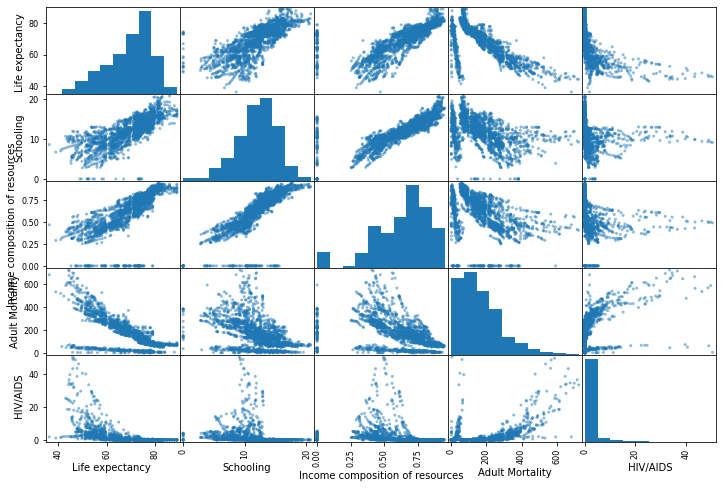

In [16]:
key_attributes = ["Life expectancy ", "Schooling", "Income composition of resources", "Adult Mortality", " HIV/AIDS"]

from pandas.plotting import scatter_matrix
scatter_matrix(train_life_data[key_attributes], figsize=(12,8))

These graphs indicate that:

1) The attributes positively correlated with life expectancy are positively correlated with one another

2) The attributes negatively correlated with life expectancy are positively correlated with one another

3) There is negative correlation between:

    i) Attributes positively correlated with life expectancy; and
    
    ii) Attributes negatively correlated with life expectancy



Let me consider the nature of the NA values and how to deal with each one.

In [17]:
missing_summary = train_life_data.isnull()
missing_summary.sum()[missing_summary.sum()>0]

Alcohol                            152
Hepatitis B                        450
 BMI                                26
Polio                               16
Total expenditure                  179
Diphtheria                          16
GDP                                359
Population                         523
 thinness  1-19 years               26
 thinness 5-9 years                 26
Income composition of resources    128
Schooling                          128
dtype: int64

In [18]:
train_life_data[missing_summary["Schooling"] == 1]["Status"].value_counts()

Developing    91
Developed     37
Name: Status, dtype: int64

In [19]:
train_life_data[missing_summary["Income composition of resources"] == 1]["Status"].value_counts()

Developing    91
Developed     37
Name: Status, dtype: int64

In [20]:
train_life_data[["Status", "Schooling", "Income composition of resources"]].groupby("Status").mean()



Schooling  Income composition of resources
Status                                                
Developed   15.828150                         0.851496
Developing  11.246714                         0.584374

Schooling and Income composition:

    1) 30% of NA values relating to Schooling and Income composition relate to developed countries.

    2) There is a high correlation between these attributes and life expectancy

    3) Developed countries are more likely to have high rates of schooling and income composition.

Therefore, using the median seems appropriate for these missing values in order to positively adjust values for any developed countries rather than use a value of nil.

Population and BMI:

    1) Population has almost no correlation to life expectancy.
    
    2) A high number of BMI figures range from 40-80 which seems odd. 

Therefore, I will ignore these variables. 

I do not want to make any assumptions over the nature of the remaining variables. Therfore, I will replace NA values with the median for these figures also.

We are now ready to build our column transformers for each of our features:

1) A simple imputer to calculate a median for NA values in our numerical columns.

2) A one-hot encoder for the categorical attribute of "Status"

3) A standard scaler for our numerical attributes (which we will not remove)


In [21]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [22]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('stand_scaler', StandardScaler()),
])

In [23]:
# Only one categorical attribute to consider

cat_attribs = ["Status"]

# We do not consider country, year, BMI, population. Remaning variables are numerical

num_attribs = ['Adult Mortality','infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

# Let's construct our pipeline

full_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(), cat_attribs),
    ("num", num_pipeline, num_attribs),
])



In [24]:
# Prepare training data and labels

train_life_data_prepared = full_pipeline.fit_transform(train_life_data)
y_train = train_life_data["Life expectancy "]

Let's train three models and see which is the most effective. We'll consider

1) Linear Regression

2) Random Forests

3) Support Vector Machines

We will use cross_val_score with ten folds to ensure we don't overfit the data and can assess the models accurately.

In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [26]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, train_life_data_prepared, y_train, cv=10, scoring="neg_mean_squared_error")
lin_reg_scores_rmse = np.sqrt(-lin_scores)
lin_reg_scores_rmse.mean(), lin_reg_scores_rmse.std()

(4.096862315455629, 0.28979528300081264)

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg, train_life_data_prepared, y_train, cv=10, scoring="neg_mean_squared_error")
forest_reg_scores_rmse = np.sqrt(-forest_scores)
forest_reg_scores_rmse.mean(), forest_reg_scores_rmse.std()

(1.8750355199946345, 0.12533800405882745)

In [28]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.5)
svm_scores = cross_val_score(svm_reg, train_life_data_prepared, y_train, cv=10, scoring="neg_mean_squared_error")
svm_reg_scores_rmse = np.sqrt(-svm_scores)
svm_reg_scores_rmse.mean(), svm_reg_scores_rmse.std()

(4.206157948949341, 0.3019704760787052)

Random Forests was the more effective model. We will take this and try to optimise some of the parameters to see if we can make it even more accurate by using grid search.

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = [
    {'n_estimators': [10, 50, 100, 120], 'max_features': [5, 10, 15, 17]},
    {'bootstrap': [False], 'n_estimators': [10, 50, 100, 120], 'max_features': [5, 10, 15, 17]}]

forest_reg = RandomForestRegressor()

forest_reg.get_params().keys()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(train_life_data_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 17],
                          'n_estimators': [10, 50, 100, 120]},
                         {'bootstrap': [False], 'max_features': [5, 10, 15, 17],
                          'n_estimators': [10, 50, 100, 120]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [31]:
grid_search.best_params_  # Show the best parameters

{'bootstrap': False, 'max_features': 10, 'n_estimators': 120}

In [32]:
np.sqrt(-grid_search.best_score_)   # RMSE for best parameters

1.7956435553142456

In [33]:
# Let's identify the key features in our model

feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.00284152, 0.00159831, 0.192123  , 0.01874673, 0.00759958,
       0.00364887, 0.00258846, 0.00369803, 0.03367211, 0.00527642,
       0.00652434, 0.00458764, 0.40035635, 0.0045144 , 0.01100152,
       0.01910402, 0.2254152 , 0.05670351])

In [34]:
all_attribs = cat_attribs + num_attribs

feature_summary = pd.DataFrame(sorted(zip(feature_importances, all_attribs), reverse=True), columns=["Importance", "Feature"]).set_index("Feature")

feature_summary

Importance
Feature                                    
GDP                                0.400356
Schooling                          0.225415
infant deaths                      0.192123
Polio                              0.033672
Income composition of resources    0.019104
Alcohol                            0.018747
 thinness 5-9 years                0.011002
percentage expenditure             0.007600
Diphtheria                         0.006524
Total expenditure                  0.005276
 HIV/AIDS                          0.004588
 thinness  1-19 years              0.004514
under-five deaths                  0.003698
Hepatitis B                        0.003649
Status                             0.002842
Measles                            0.002588
Adult Mortality                    0.001598

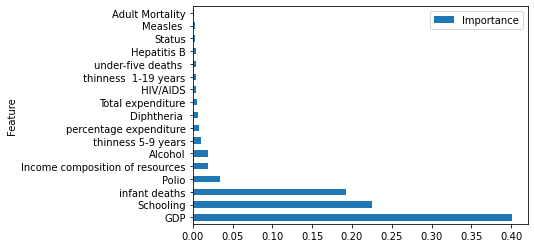

In [35]:
feature_summary.plot.barh()             # Visualise the table above

An analysis of these features indicates that GDP, Schooling and Infant Deaths were the three most important features that our model considered when making predictions.

Let's evaluate our model on the test set.

In [36]:
from sklearn.metrics import mean_squared_error

In [37]:
final_model = grid_search.best_estimator_       # Choose optimal model

X_test = test_life_data                         # Prepare test sets
y_test = test_life_data["Life expectancy "].copy()

X_test_prepared = full_pipeline.transform(X_test)

test_predictions = final_model.predict(X_test_prepared)             # Compute predictions

test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
test_rmse

1.782226228071023

An error of 1.78 years seems very good and close to the figure we arrived at on our test set.

Let's compute a 95% confidence interval for this mean to better understand how precise this figure is

In [38]:
from scipy import stats

confidence = 0.95
squared_errors = (test_predictions - y_test) ** 2
deg_freedom = len(squared_errors) - 1
std_error = stats.sem(squared_errors)

np.sqrt(stats.t.interval(confidence, deg_freedom, loc=squared_errors.mean(),
        scale=std_error))

array([1.57430389, 1.96830585])

The range of values seems reasonable and still more accurate than our SVM and Linear Regression models. 

The model could possible be improved by considering:

1) Imputting medians for specific countries rather than medians for an entire feature

2) Carefully considering nil values and whether these should be updated

3) Removing additional features e.g. Status or Measles

4) Training a neural network